In [16]:
import pandas as pd
import numpy as np

In [54]:
data = pd.DataFrame({
    'Feature': ['Age', 'Height', 'Weight', 'Gender', 'Systolic blood pressure', 'Diastolic blood pressure', 'Cholesterol', 'Glucose', 'Smoking', 'Alcohol intake', 'Physical activity', 'Presence or absence of cardiovascular disease'],
    'Variable Type': ['Objective Feature', 'Objective Feature', 'Objective Feature', 'Objective Feature', 'Examination Feature', 'Examination Feature', 'Examination Feature', 'Examination Feature', 'Subjective Feature', 'Subjective Feature', 'Subjective Feature', 'Target Variable'],
    'Variable' : ['age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active','cardio'],
    'Value Type' : ['int (days)', 'int (cm)', 'float (kg)', 'categorical code', 'int', 'int', '1: normal, 2: above normal, 3: well above normal', '1: normal, 2: above normal, 3: well above normal', 'binary', 'binary', 'binary', 'binary' ]


})
data.set_index( 'Feature', inplace=True)


In [55]:
data

,Variable Type,Variable,Value Type
Feature,,,
Age,Objective Feature,age,int (days)
Height,Objective Feature,height,int (cm)
Weight,Objective Feature,weight,float (kg)
Gender,Objective Feature,gender,categorical code
Systolic blood pressure,Examination Feature,ap_hi,int
Diastolic blood pressure,Examination Feature,ap_lo,int
Cholesterol,Examination Feature,cholesterol,"1: normal, 2: above normal, 3: well above normal"
Glucose,Examination Feature,gluc,"1: normal, 2: above normal, 3: well above normal"
Smoking,Subjective Feature,smoke,binary


In [77]:
df = pd.read_csv('C:\\Users\\TOW Admin\\Downloads\\Test Documentation\\medical_examination 1.csv')

In [78]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [79]:
bmi = df["weight"] / ((df["height"] / 100) ** 2)
df["overweight"] = bmi.apply(lambda x: 1 if x > 25 else 0)

In [85]:
bmi

0        21.967120
1        34.927679
2        23.507805
3        28.710479
4        23.011177
           ...    
69995    26.927438
69996    50.472681
69997    31.353579
69998    27.099251
69999    24.913495
Length: 70000, dtype: float64

In [86]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [80]:
df["cholesterol"] = df["cholesterol"].map({1: 0, 2: 1, 3: 1})
df["gluc"] = df["gluc"].map({1: 0, 2: 1, 3: 1})

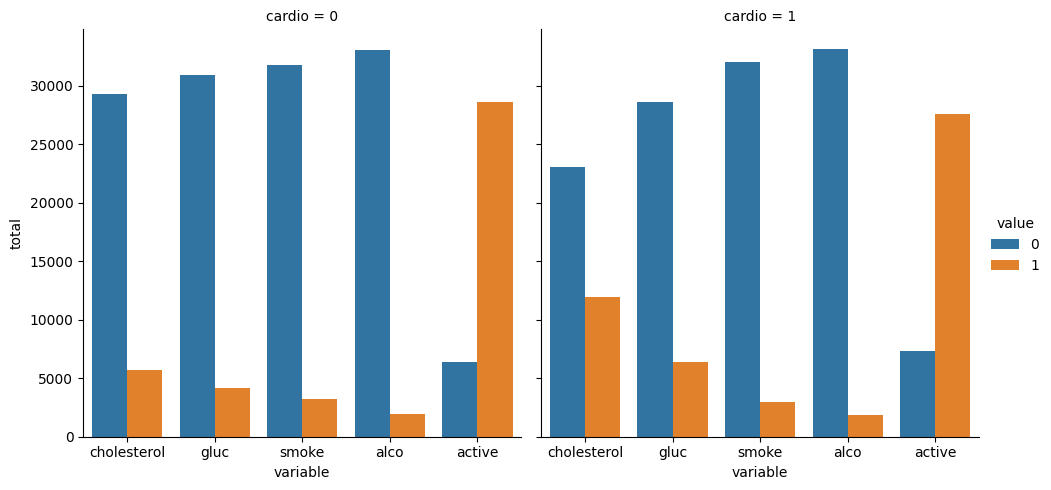

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["cholesterol", "gluc", "smoke", "alco", "active"])
fig = sns.catplot(data=df_cat, x="variable", hue="value", col="cardio", kind="count")
fig.set_axis_labels("variable", "total")
plt.show()

In [82]:
df = df.drop(df[(df['ap_lo'] > df['ap_hi']) |
                (df['height'] < df['height'].quantile(0.025)) |
                (df['height'] > df['height'].quantile(0.975)) |
                (df['weight'] < df['weight'].quantile(0.025)) |
                (df['weight'] > df['weight'].quantile(0.975))].index)

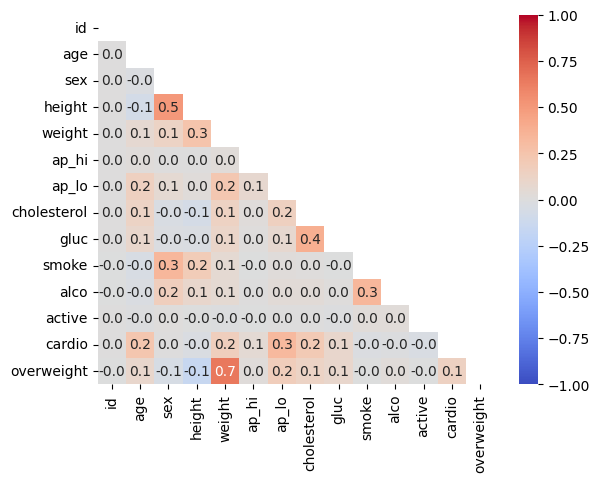

In [83]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", mask=mask, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.show()